In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geocat.viz as gv

In [2]:
plt.rcParams.update({
    'font.size': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'axes.linewidth': 1.2,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
    'savefig.format': 'png',
    'savefig.bbox': 'tight',
    'font.family': 'Times New Roman',
    'text.usetex': False
})

In [3]:
data = pd.read_csv("../dataset/evaporations.csv")
dates = pd.to_datetime(data['DATE'])
y = data['Observed']
x1 = data['WQ2EV']
x2 = data['WQMG2EV']
x3 = data['Penman']

In [4]:
# Calculate standard deviation, correlation, and bias for each model
def calculate_taylor_metrics(y_true, y_pred):
    sdev = np.std(y_pred) / np.std(y_true)  # Normalized standard deviation
    ccorr = np.corrcoef(y_true, y_pred)[0, 1]  # Correlation coefficient
    bias = np.mean(y_pred - y_true) / np.mean(y_true) * 100  # Bias as a percentage
    return sdev, ccorr, bias

In [5]:
# Get metrics for each model
metrics_obs = calculate_taylor_metrics(y, y)  # Observations (reference)
metrics_x1 = calculate_taylor_metrics(y, x1)  # WQ2EV BO-LSTM
metrics_x2 = calculate_taylor_metrics(y, x2)  # WQMG2EV BO-LSTM
metrics_x3 = calculate_taylor_metrics(y, x3)  # Penman-FAO

In [6]:
# Unpack metrics
sdev_obs, ccorr_obs, bias_obs = metrics_obs
sdev_x1, ccorr_x1, bias_x1 = metrics_x1
sdev_x2, ccorr_x2, bias_x2 = metrics_x2
sdev_x3, ccorr_x3, bias_x3 = metrics_x3

In [7]:
print("Metrics for Observations:")
print(f"Normalized Standard Deviation: {sdev_obs}")
print(f"Correlation Coefficient: {ccorr_obs}")
print(f"Bias: {bias_obs}%\n")

print("Metrics for WQ2EV BO-LSTM:")
print(f"Normalized Standard Deviation: {sdev_x1:.2f}")
print(f"Correlation Coefficient: {ccorr_x1:.2f}")
print(f"Bias: {bias_x1:.2f}%\n")

print("Metrics for WQMG2EV BO-LSTM:")
print(f"Normalized Standard Deviation: {sdev_x2:.2f}")
print(f"Correlation Coefficient: {ccorr_x2:.2f}")
print(f"Bias: {bias_x2:.2f}%\n")

print("Metrics for PENMAN Model:")
print(f"Normalized Standard Deviation: {sdev_x3:.2f}")
print(f"Correlation Coefficient: {ccorr_x3:.2f}")
print(f"Bias: {bias_x3:.2f}%")

Metrics for Observations:
Normalized Standard Deviation: 1.0
Correlation Coefficient: 1.0
Bias: 0.0%

Metrics for WQ2EV BO-LSTM:
Normalized Standard Deviation: 0.97
Correlation Coefficient: 0.95
Bias: 1.38%

Metrics for WQMG2EV BO-LSTM:
Normalized Standard Deviation: 0.94
Correlation Coefficient: 0.99
Bias: 0.18%

Metrics for PENMAN Model:
Normalized Standard Deviation: 0.83
Correlation Coefficient: 0.96
Bias: -25.58%


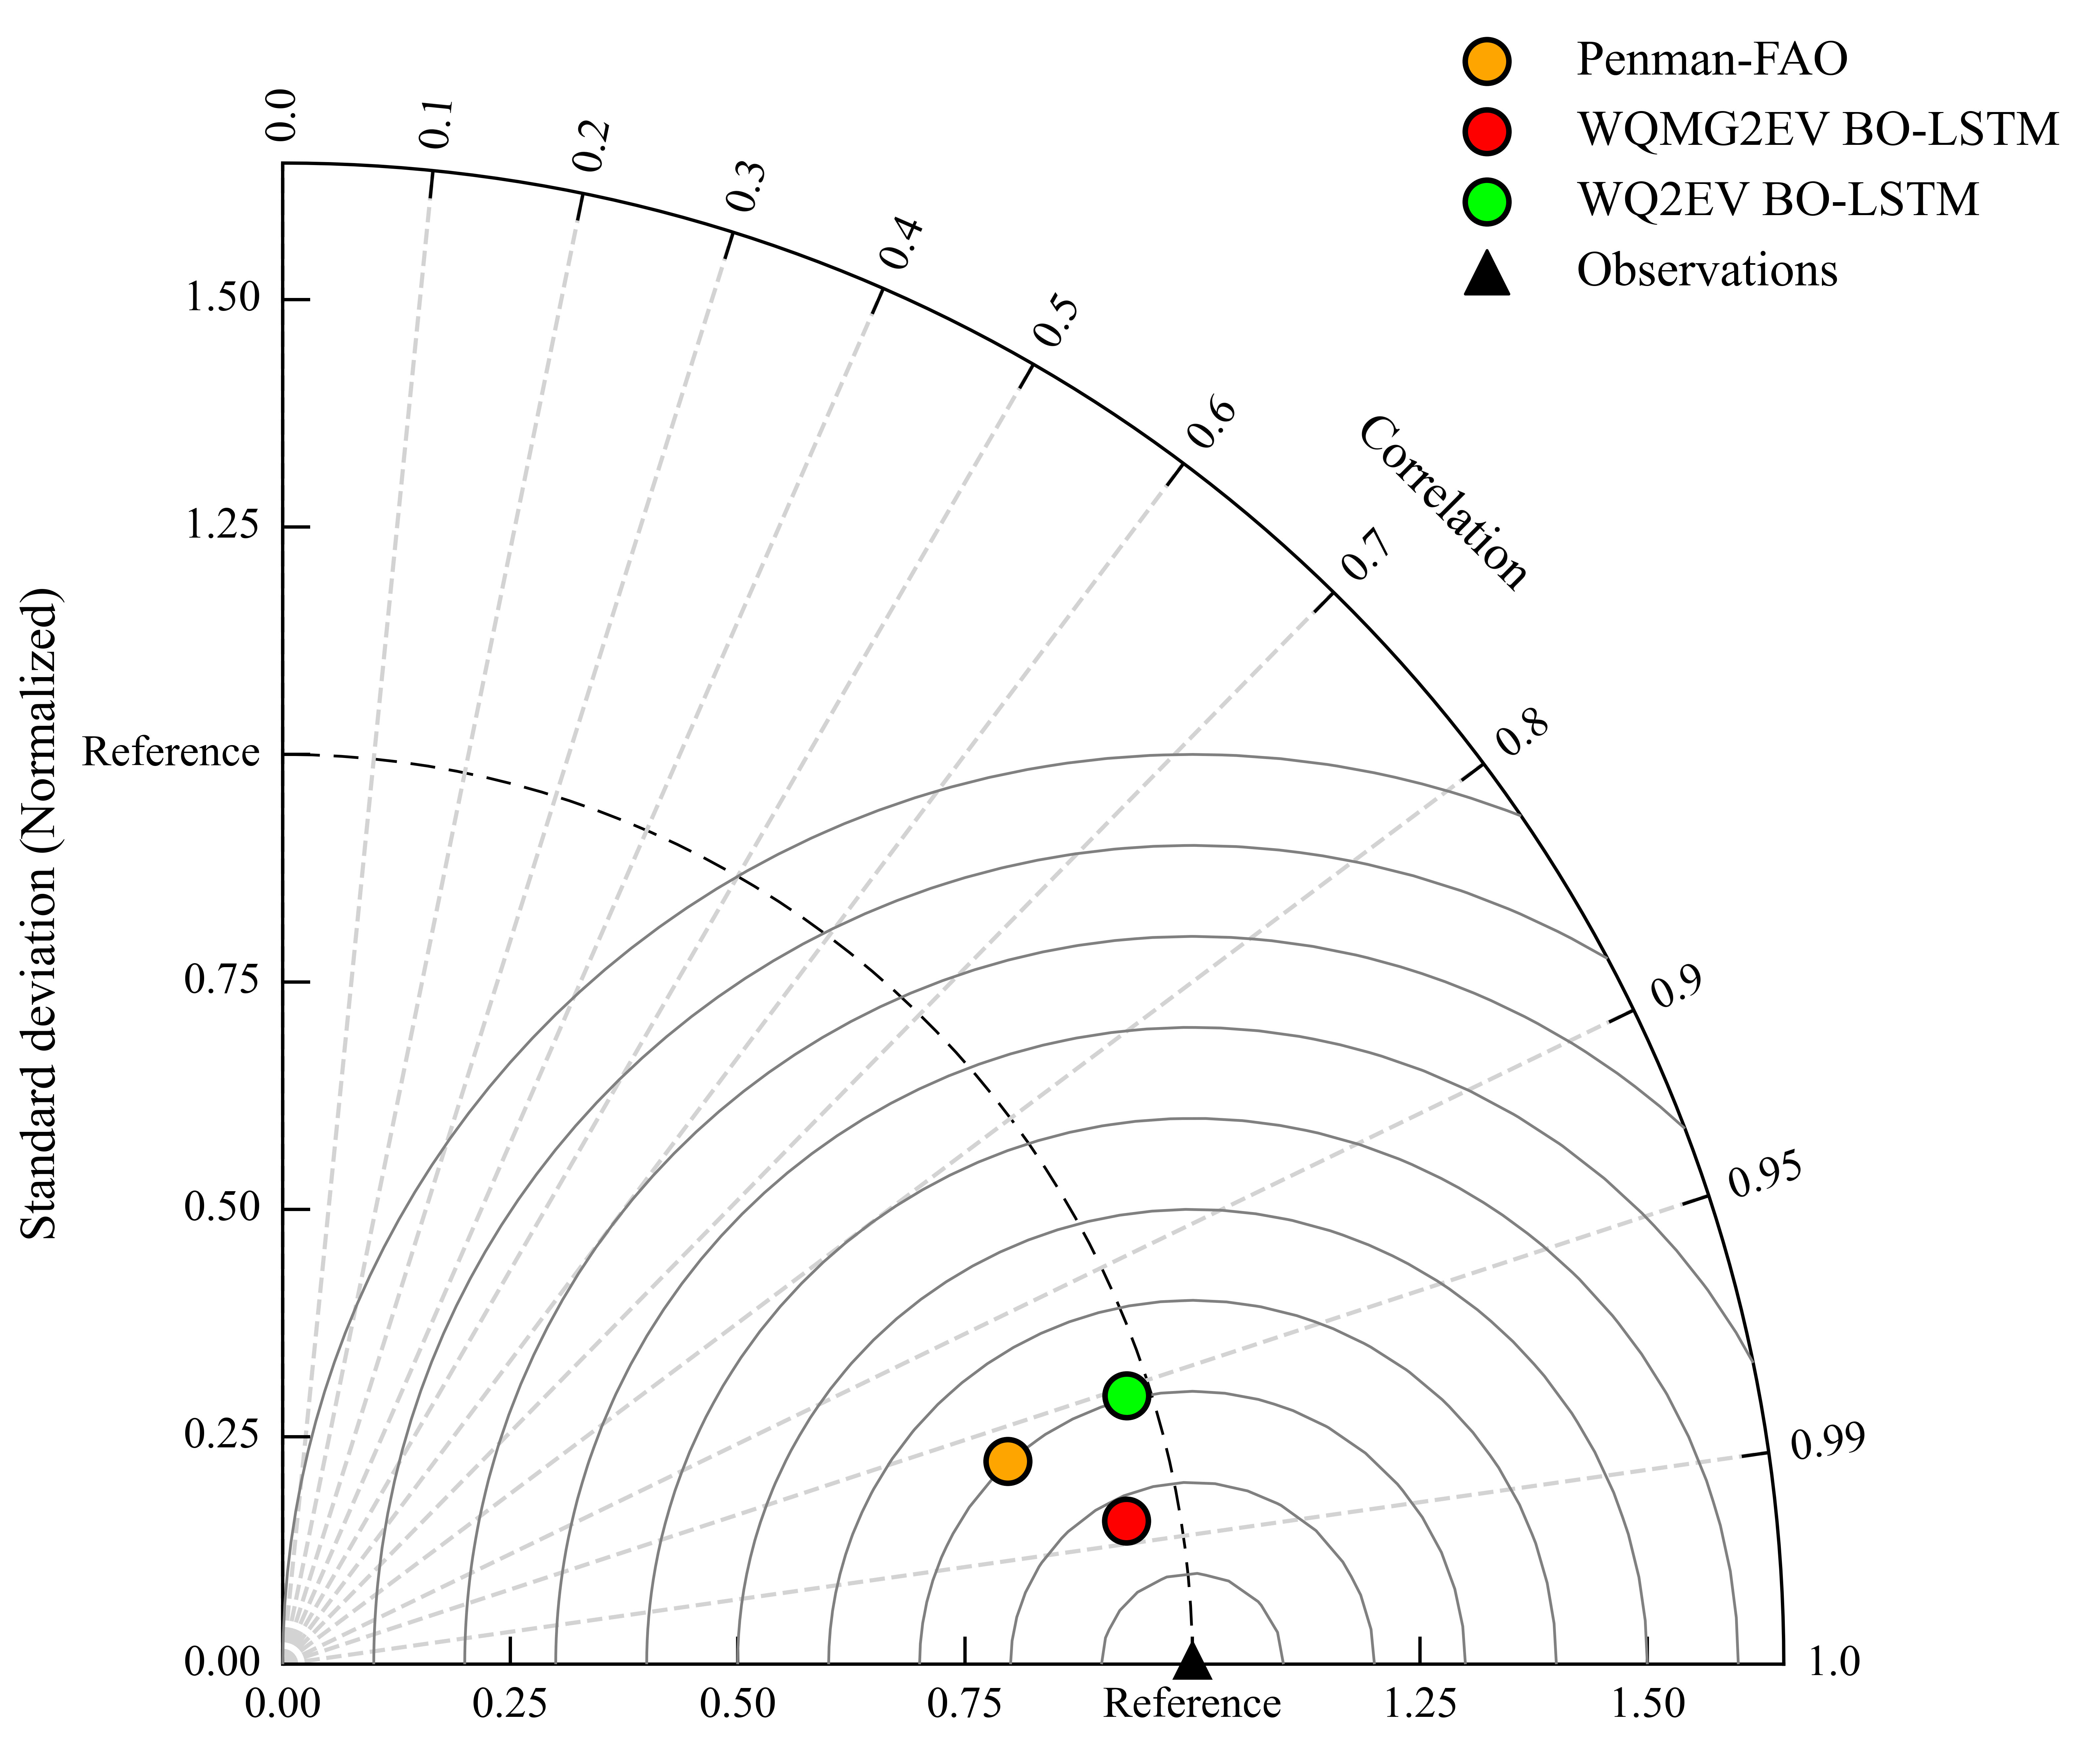

In [10]:
# Create figure and TaylorDiagram instance
fig = plt.figure(figsize=(11, 10), dpi=600)
taylor = gv.TaylorDiagram(fig=fig, label='Reference')

# Draw diagonal dashed lines from origin to correlation values with a distinct color
taylor.add_corr_grid(np.concatenate((np.arange(0, 1, 0.1), np.array([0.95, 0.99]))), 
                     linewidth=1.5, 
                     linestyle='--', 
                     colors='gray'
                     )

# Add observation points with triangle marker
taylor.add_model_set([sdev_obs],
                     [ccorr_obs],
                     marker='^',
                     color='black',
                     label='Observations',
                     s=250,
                     zorder=10,
                     fontsize=0)

# Add models with distinct markers and colors without automatic labels
taylor.add_model_set([sdev_x1],
                     [ccorr_x1],
                     bias_array=[bias_x1],
                     color='lime',
                     label='WQ2EV BO-LSTM',
                     s=250,
                     zorder=10,
                     marker='o',
                     edgecolors='black',
                     linewidths=2,
                     fontsize=0)

taylor.add_model_set([sdev_x2],
                     [ccorr_x2],
                     bias_array=[bias_x2],
                     color='red',
                     label='WQMG2EV BO-LSTM',
                     s=250,
                     zorder=10,
                     marker='o',
                     edgecolors='black',
                     linewidths=2,
                     fontsize=0)

taylor.add_model_set([sdev_x3],
                     [ccorr_x3],
                     bias_array=[bias_x3],
                     color='orange',
                     label='Penman-FAO',
                     s=250,
                     zorder=10,
                     marker='o',
                     edgecolors='black',
                     linewidths=2,
                     fontsize=0)

# Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

# Add figure legend
taylor.add_legend(xloc=1.2, yloc=1.1, loc='upper right', fontsize=18)

# Add constant centered RMS difference contours with adjusted style
taylor.add_contours(levels=np.arange(0, 1.1, 0.1),
                    colors='gray',
                    linewidths=1.0,
                    linestyles='solid',
                    zorder=5)

plt.savefig(f"./../plots/taylor.png", dpi=600, bbox_inches='tight')
plt.show()